# TASK - 2 : PREDICTION USING DECISION TREE ALGORITHM

## PROBLEM STATEMENT : 

## Create Decision Tree Classifier and visualize it graphically

## If we feed new data to this classifier, it would be able to predict the right class accordingly

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### IMPORTING DATASET

In [2]:
data=pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Drop 'Id' column as it has no role in prediction
data.drop('Id',axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.shape

(150, 5)

### DATA PREPROCESSING

In [8]:
# Handling NULL values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# No NULL values in data

In [10]:
# All values are in the same scale i.e. cm hence scaling is not required

### CATEGORICAL ENCODING

In [11]:
# Possible values in 'Species' column
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
# There are 3 different species of flowers in the dataset

In [13]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [14]:
data['Species']=label.fit_transform(data['Species'])

In [15]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### SPLITTING FEATURES AND TARGET COLUMNS

In [16]:
# Features
x=data.drop('Species',axis=1)

In [17]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
# Target
y=data['Species']

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

### CORRELATION MATRIX

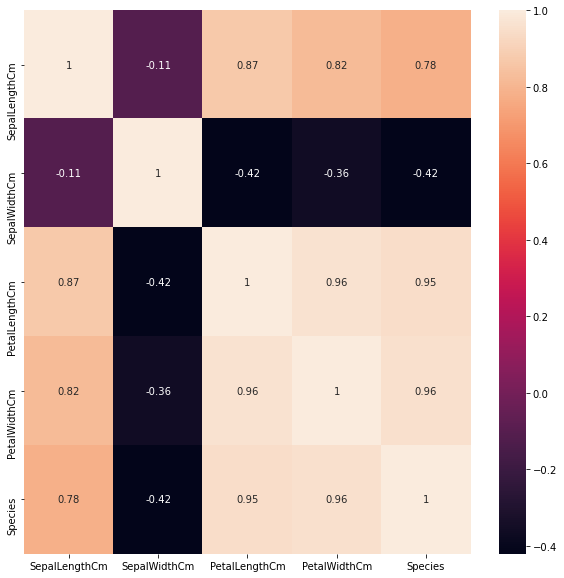

In [20]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [21]:
# Highest correlation - 
# 1) Petal width 
# 2) Petal length 

### TRAIN TEST DATA SPLIT

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=20)

In [24]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
122,7.7,2.8,6.7,2.0
13,4.3,3.0,1.1,0.1
58,6.6,2.9,4.6,1.3
114,5.8,2.8,5.1,2.4
57,4.9,2.4,3.3,1.0
...,...,...,...,...
22,4.6,3.6,1.0,0.2
75,6.6,3.0,4.4,1.4
137,6.4,3.1,5.5,1.8
15,5.7,4.4,1.5,0.4


In [25]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
47,4.6,3.2,1.4,0.2
73,6.1,2.8,4.7,1.2
74,6.4,2.9,4.3,1.3
129,7.2,3.0,5.8,1.6
67,5.8,2.7,4.1,1.0
89,5.5,2.5,4.0,1.3
143,6.8,3.2,5.9,2.3
21,5.1,3.7,1.5,0.4
108,6.7,2.5,5.8,1.8
12,4.8,3.0,1.4,0.1


In [26]:
y_train

122    2
13     0
58     1
114    2
57     1
      ..
22     0
75     1
137    2
15     0
99     1
Name: Species, Length: 135, dtype: int32

In [27]:
y_test

47     0
73     1
74     1
129    2
67     1
89     1
143    2
21     0
108    2
12     0
147    2
76     1
119    2
35     0
28     0
Name: Species, dtype: int32

### DECISION TREE CLASSIFICATION MODEL

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree=DecisionTreeClassifier()
model=tree.fit(x_train,y_train)

In [30]:
# Predictions from the model
y_pred=tree.predict(x_test)

In [31]:
# Classification matrix

from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.83      0.91         6
           2       0.80      1.00      0.89         4

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.95      0.93      0.93        15



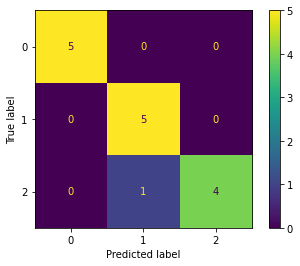

In [32]:
# Confusion Matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model,x_test,y_test)

### VISUALIZATION OF DECISION TREE 

In [33]:
# Text Representation of decision tree

from sklearn.tree import export_text

text_representation = export_text(model)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- feature_2 <= 4.75
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_2 >  4.75
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.05
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



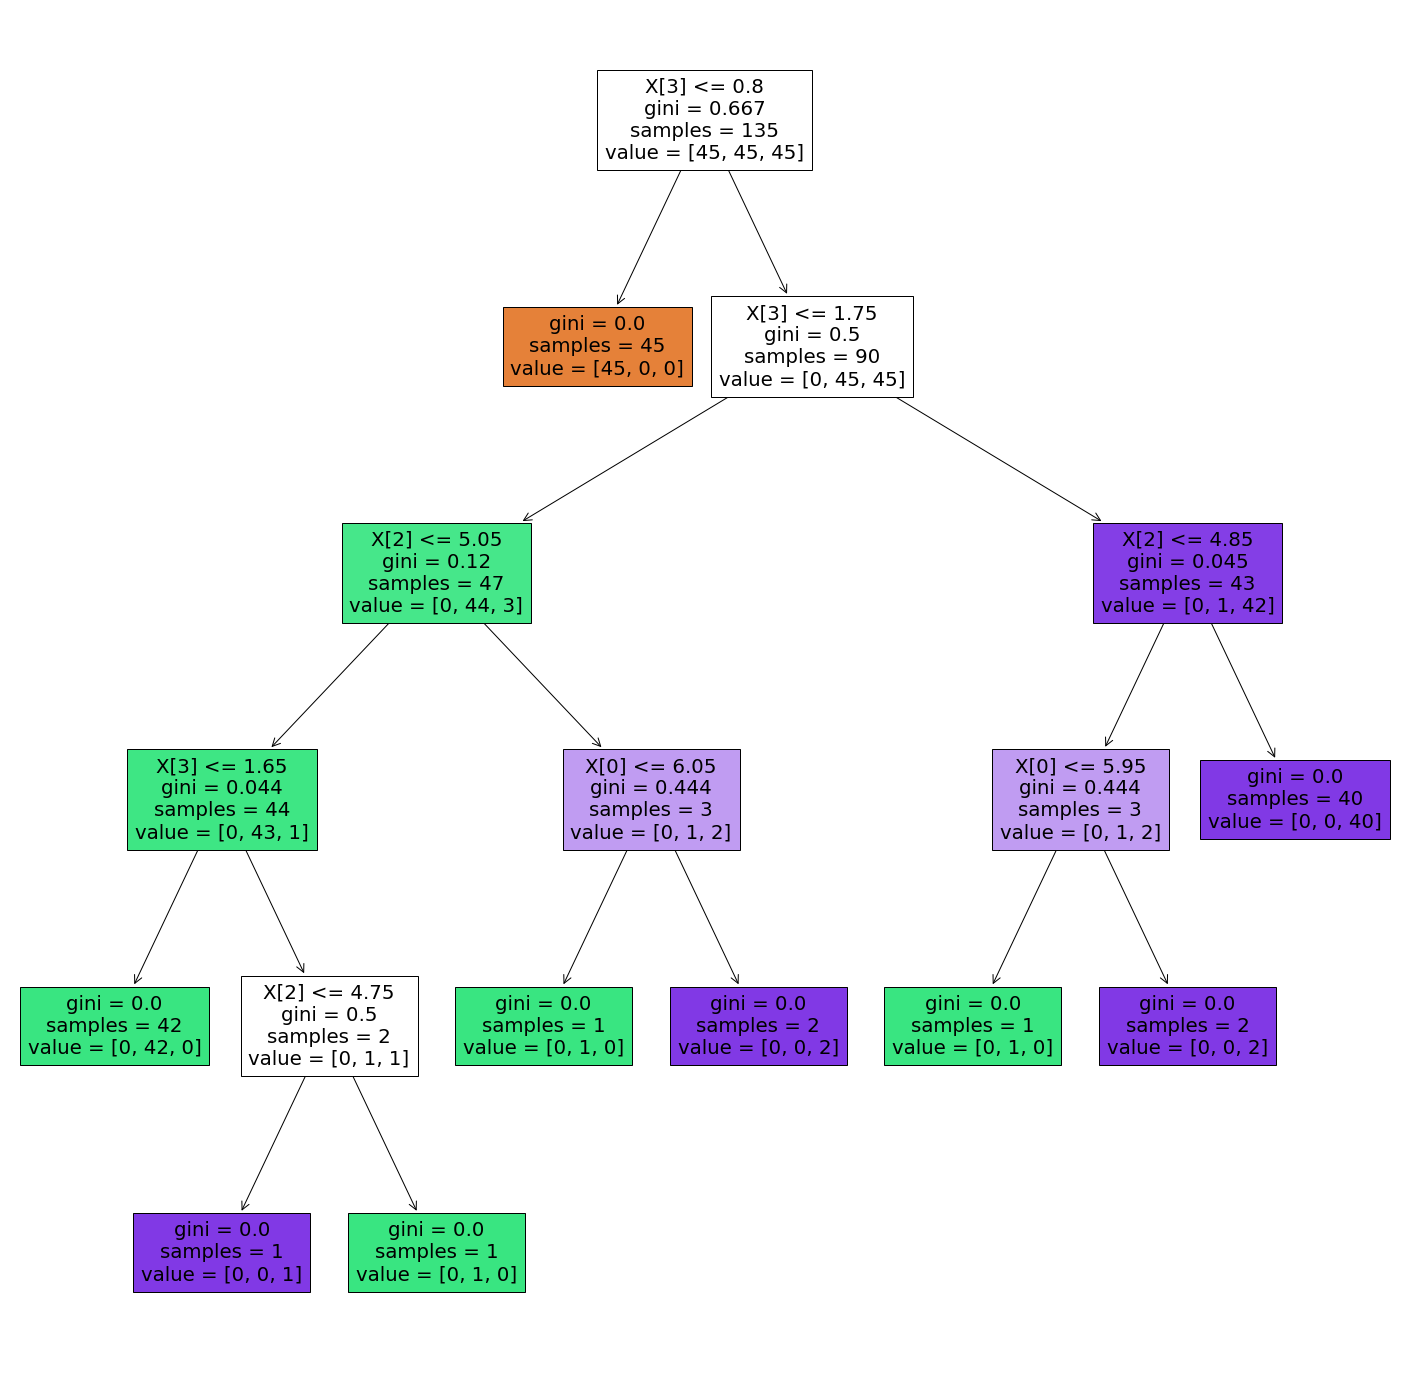

In [34]:
# Graphical Representation
from sklearn.tree import plot_tree

plt.figure(figsize=(25,25))
_=plot_tree(model,filled=True)